# Forest Fire Analysis

Author: Cong Liu

Date: 11/23/2019

### 0. Get the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('forestfires.csv')

In [ ]:
df.shape

(517, 13)

There are 517 rows and 13 columns in the data set.

### 2. Business Understanding

What is the most serious and overlooked problem of our time? We think it's the environment.

A major environmental problem is the occurrence of forest fires (also known as wildfires), which damage and destroy the forest environment, causing economic and ecological damage to humans, as well as physical and mental damage. Although people have been trying to control the fire, the effect is not ideal. 

We believe that the reason why the consequences of fire accidents are so serious is that people cannot make a good judgment and predict the time and place of fire.

In order to help with the problem of fire, we decided to make a data mining and analysis report related to the problem of fire-prone areas.

We chose "Forest Fires Dataset" from the UCI Machine Learning Repository2; 

Source Citation: [Cortez and Morais, 2007] P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: [Web Link]
Source URL: UCI Machine Learning Repository2 - Forest Fires Data Set 

Retrieved from:
	https://archive.ics.uci.edu/ml/datasets/Forest+Fires


We use this dataset because we found that Portugal is highly affected by forest fires, thus, the dataset is suitable for our analysis. The dataset we will use covers meteorological and spatiotemporal data for forest fires in Portugal’s Montesinho Natural Park between 2000 and 2003, with 13 attributes. Our projectis going to build a model to predict the burned area of forest fires and to estimate the fire case level for different attributes values by cleaning, analyzing and predicting the dataset. In addition, another reason we do this analysis is because we want to use other factors to predict the areas where fires are likely to occur and the severity of the fires

We plan to divide the fire prone area into three levels (small, median and large) and then use it as the label. Thus, the data mining approach will be classification and the models will include Gaussian Naïve Bayes, Bernoulli Naïve Bayes, Support Vector Machine, Multi-layer Perceptron, Decision tree, Random Forest and K Nearest Neighbors. The software will be Scikit-Learn.

### 3. Data Understanding and Preprocessing

#### Attribute Information:####


1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Total count of all variables are 517;

The range of attribute X is bewteen 1 and 9, median is 4, mean is 4.669246 with a standard deviation 2.313778.

The range of Y is bewteen 1 and 9, median is 4, mean is 4.299807 with a standard deviation 1.2299.

Month and Day are not numerical attributes; 

In [ ]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

There are not any missing values in the dataset.

In [ ]:
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


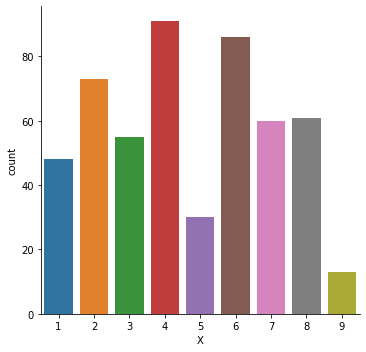

In [ ]:
sns.catplot(data=df, x='X', kind='count')

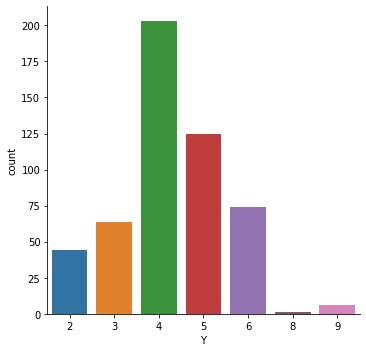

In [ ]:
sns.catplot(data=df, x='Y', kind='count')

Base on the plot histgraph above, we can find that the fire case always happened in Y=4,5 and X = 1,2,3,4,6,7,8. 12

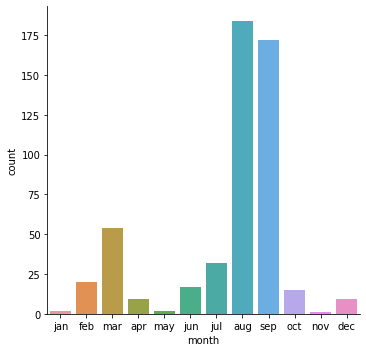

In [ ]:
sns.catplot(data=df, x='month', kind='count',order = ["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"])

Based on the plot graph above, we can see that the fire cases are obviously appeared in August and September. Then we want to know whether other factors in these two months are different from other months;

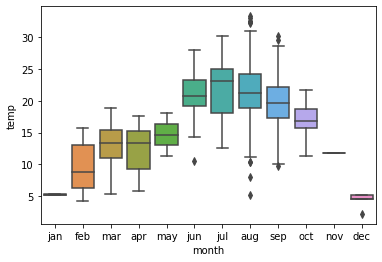

In [ ]:
sns.boxplot(x=df['month'], y=df['temp'],order = ["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"])

Now we find that there is a strong relationship between month and temperature; Thus, we want to know if there are any other attributes can be implied by temp;



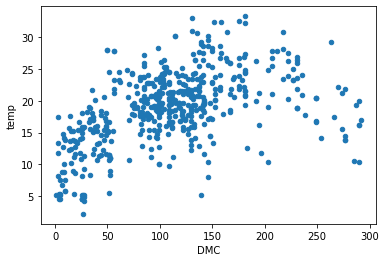

In [ ]:
df.plot.scatter('DMC', 'temp')

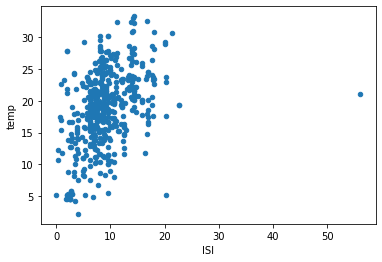

In [ ]:
df.plot.scatter('ISI', 'temp')

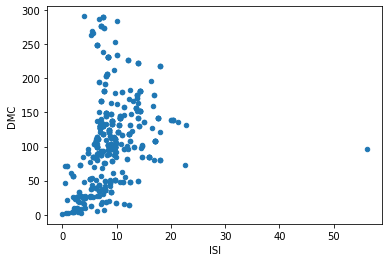

In [ ]:
df.plot.scatter('ISI', 'DMC')

Based on these graphs above, we can find that there exists strong relationship between DMC vs. temp, ISI vs. temp, and DMC vs ISI; Thus, we decide to use temp imply these attributes and delete them from the dataset.

Also, X and Y are unique and not related to our analysis and they, thus, we delete them from dataset.


In [ ]:
df = df.drop(columns='X')
df = df.drop(columns='Y')
df = df.drop(columns='month')
df = df.drop(columns='DMC')
df = df.drop(columns='ISI')

In [ ]:
df['transformed_area'] = np.log(df['area'] + 1)

In [ ]:
df['transformed_area'].describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: transformed_area, dtype: float64

In [ ]:
bins = [df['transformed_area'].min(), 1.111, 2.024, df['transformed_area'].max()]
group_names = ['small', 'medium', 'large']
df['area_label'] = pd.cut(df['transformed_area'], bins, labels=group_names, include_lowest=True)
df['area_label'].value_counts()

small     312
large     130
medium     75
Name: area_label, dtype: int64

In [ ]:
day_nums = {"day": {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6, "sun":7 }}
df.replace(day_nums, inplace=True)
df.head()

,day,FFMC,DC,temp,RH,wind,rain,area,transformed_area,area_label
0,5,86.2,94.3,8.2,51,6.7,0.0,0.0,0.0,small
1,2,90.6,669.1,18.0,33,0.9,0.0,0.0,0.0,small
2,6,90.6,686.9,14.6,33,1.3,0.0,0.0,0.0,small
3,5,91.7,77.5,8.3,97,4.0,0.2,0.0,0.0,small
4,7,89.3,102.2,11.4,99,1.8,0.0,0.0,0.0,small


Firstly, we did a log transform for the area attribute. Since our goal is to predict the degree of the burned area of the forest fires, we need to classify the continuous values of area into different class labels (small, medium, and large) to determine the levels of the forset fires. Based on the summary statistics of the transformed_area, we decide to classify the values less than 1.111 as samll, the values greater than 1.111 but less than 2.024 as medium, and the values greater than 2.024 as large. Then, we can see there are 312 observations being classified as small, 130 observations being classified as medium and 75 observations being classified as large.

Next, since the day attribute is categorical, we decide to convert and replace them to numeric values.

The dataframe after transforming is shown above.

### 4. Modeling and Assessment

Our goal is to build a model to predict the burned area of the forest fires (the attribute "area" in the original dataset) and we have classified the forest fire into three levels (small, medium, large), thus the data mining approach is classification. Our models include Gaussian Naïve Bayes, Bernoulli Naïve Bayes, Support Vector Machine, Multi-layer Perceptron, Decision tree, Random Forest and K Nearest Neighbors. We will choose the model that gives the best performance on the dataset.

The evaluation approach we will use is K-fold cross-validation and the K value we choose is 10. The reason why we choose cross-validation instead of train/test split is because it can give us more accurate estimate of accuracy and we can make more "efficient" use of data
since every observation is used for both training and testing. 

For each classifier, we will use 10-fold cross-validation to split the train and test sets and then calculate the training and testing accuracy scores to evaluate the performance of the classifier. By comparing their accuracy socres, we will choose a best classifier among them. The software we will use is the Python package scikit-learn because it offers us a convienient use of all the seven clasddifiers mentioned above.

In [ ]:
X = np.array(df.iloc[:,0:7].values)
y = np.array(df['area_label'])

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics

#### Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv_results_1 = cross_validate(gnb, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Gaussian Naïve Bayes are:\n", cv_results_1['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_1['train_score'].mean())
print("The 10-fold cross-validation testing results for Gaussian Naïve Bayes are:\n", cv_results_1['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_1['test_score'].mean())

The 10-fold cross-validation training results for Gaussian Naïve Bayes are:
 [0.59611231 0.59698276 0.59569892 0.60215054 0.59871245 0.5944206
 0.59656652 0.60300429 0.59656652 0.25321888]
The avearge training accuracy is: 0.563
The 10-fold cross-validation testing results for Gaussian Naïve Bayes are:
 [0.57407407 0.60377358 0.59615385 0.59615385 0.60784314 0.58823529
 0.58823529 0.60784314 0.58823529 0.29411765]
The avearge testing accuracy is: 0.564


#### Bernoulli Naïve Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
cv_results_2 = cross_validate(bnb, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Bernoulli Naïve Bayes are:\n", cv_results_2['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_2['train_score'].mean())
print("The 10-fold cross-validation testing results for Bernoulli Naïve Bayes are:\n", cv_results_2['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_2['test_score'].mean())

The 10-fold cross-validation training results for Bernoulli Naïve Bayes are:
 [0.60475162 0.60344828 0.60430108 0.60430108 0.60300429 0.60300429
 0.60300429 0.60300429 0.60300429 0.60300429]
The avearge training accuracy is: 0.603
The 10-fold cross-validation testing results for Bernoulli Naïve Bayes are:
 [0.59259259 0.60377358 0.59615385 0.59615385 0.60784314 0.60784314
 0.60784314 0.60784314 0.60784314 0.60784314]
The avearge testing accuracy is: 0.604


#### Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
cv_results_3 = cross_validate(svm, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Support Vector Machine are:\n", cv_results_3['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_3['train_score'].mean())
print("The 10-fold cross-validation testing results for Support Vector Machine are:\n", cv_results_3['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_3['test_score'].mean())

The 10-fold cross-validation training results for Support Vector Machine are:
 [0.22030238 0.61422414 0.59569892 0.31612903 0.57296137 0.42703863
 0.60300429 0.61373391 0.56223176 0.59871245]
The avearge training accuracy is: 0.512
The 10-fold cross-validation testing results for Support Vector Machine are:
 [0.2037037  0.60377358 0.55769231 0.36538462 0.64705882 0.52941176
 0.60784314 0.60784314 0.54901961 0.60784314]
The avearge testing accuracy is: 0.528


#### Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=200)
cv_results_4 = cross_validate(mlp, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Multi-layer Perceptron are:\n", cv_results_4['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_4['train_score'].mean())
print("The 10-fold cross-validation testing results for Multi-layer Perceptron are:\n", cv_results_4['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_4['test_score'].mean())

The 10-fold cross-validation training results for Multi-layer Perceptron are:
 [0.52699784 0.34267241 0.61505376 0.62580645 0.49356223 0.60944206
 0.6223176  0.62446352 0.54506438 0.58583691]
The avearge training accuracy is: 0.559
The 10-fold cross-validation testing results for Multi-layer Perceptron are:
 [0.37037037 0.24528302 0.57692308 0.59615385 0.49019608 0.60784314
 0.56862745 0.58823529 0.60784314 0.60784314]
The avearge testing accuracy is: 0.526


#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_results_5 = cross_validate(dt, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Decision Tree are:\n", cv_results_5['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_5['train_score'].mean())
print("The 10-fold cross-validation testing results for Decision Tree are:\n", cv_results_5['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_5['test_score'].mean())

The 10-fold cross-validation training results for Decision Tree are:
 [0.96760259 0.96982759 0.97204301 0.96344086 0.96781116 0.96137339
 0.96781116 0.972103   0.96566524 0.96137339]
The avearge training accuracy is: 0.967
The 10-fold cross-validation testing results for Decision Tree are:
 [0.38888889 0.32075472 0.46153846 0.48076923 0.43137255 0.37254902
 0.29411765 0.21568627 0.39215686 0.29411765]
The avearge testing accuracy is: 0.365


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
cv_results_6 = cross_validate(rf, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for Random Forest are:\n", cv_results_6['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_6['train_score'].mean())
print("The 10-fold cross-validation testing results for Random Forest are:\n", cv_results_6['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_6['test_score'].mean())

NameError: name 'cross_validate' is not defined

#### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cv_results_7 = cross_validate(knn, X, y, cv=10, return_train_score=True)
print("The 10-fold cross-validation training results for K Nearest Neighbors are:\n", cv_results_7['train_score'])
print("The avearge training accuracy is:", '%.3f'%cv_results_7['train_score'].mean())
print("The 10-fold cross-validation testing results for K Nearest Neighbors are:\n", cv_results_7['test_score'])
print("The avearge testing accuracy is:", '%.3f'%cv_results_7['test_score'].mean())

The 10-fold cross-validation training results for K Nearest Neighbors are:
 [0.6349892  0.64224138 0.66666667 0.64086022 0.64592275 0.66309013
 0.65450644 0.65879828 0.6695279  0.6695279 ]
The avearge training accuracy is: 0.655
The 10-fold cross-validation testing results for K Nearest Neighbors are:
 [0.40740741 0.47169811 0.46153846 0.46153846 0.43137255 0.37254902
 0.35294118 0.31372549 0.41176471 0.39215686]
The avearge testing accuracy is: 0.408


Based on the average training accuracy scores of the seven classifers, we can see both the Random Forest and Decision Tree fit the training data very well and have the highest average training accuracy, which is 0.967. However, if we combine the training and testing accuracy scores and compare, we can find many classifiers suffer the problem of overfitting with a higher training accuracy but a lower testing accuracy. And the overfitting is most severe on the Random Forest and Decision Tree, with testing accuracy scores 0.481 and 0.365 respectively. Overall, we find the performance of the Bernoulli Naïve Bayes is best, with a 0.603 training accuracy and a 0.604 testing accuracy. Thus, we decide to choose the Bernoulli Naïve Bayes Classifier as our final model. 

### 5. Conclusion

In conclusion, we believe the work we have done so far has achieved the goal to build a model to predict the burned area of forest fires somehow. It is worth noting that the authors in the original study stated that the SVM model can predict better. Compared to their results, in our lab, we find that the SVM model does have a decent performance, but the Gaussian Naïve Bayes and Bernoulli Naïve Bayes model can outperform it a little. However, to be honest, we wouldn’t say this result is what we expected or satisfactory since a 0.604 accuracy score on the testing data is still not good enough. It’s interesting how severe the overfitting problem is for the Decision Tree and the Random Forest model. We may want to do more feature selection or hyperparameter tuning on them in the future. Also, we think there may be many other classifiers that we haven’t covered working better and we will try to model with them.

During this lab, we had some struggles on transforming the continuous attribute “area” into categorial values and determining a threshold for the three different level. Later we decided to use the mean as threshold for small, the median as threshold for medium and the third quantile as threshold for large.